In [47]:
# %pip install pandas

In [48]:
# %pip install matplotlib

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, skewtest, kurtosis, kurtosistest

In [2]:
os.getcwd()

'/Users/mattomalley/Ames-Housing-Price-Prediction/EDA'

In [14]:
data = pd.read_csv('/Users/mattomalley/Ames-Housing-Price-Prediction/data/raw/train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
# Investigating SalePrice

data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
data['SalePrice'].median()

163000.0

In [22]:
# Skewness

price = data['SalePrice']
s = skew(price)
zscore, pvalue = skewtest(price)

print(f"Skewness: {s:.3f}, z-score: {zscore:.3f}, p-value: {pvalue:.3f}")

Skewness: 1.881, z-score: 20.184, p-value: 0.000


In [23]:
# Kurtosis

k = kurtosis(price)
zscore, pvalue = kurtosistest(price)

print(f"Kurtosis: {k:.3f}, z-score: {zscore:.3f}, p-value: {pvalue:.3f}")

Kurtosis: 6.510, z-score: 14.263, p-value: 0.000


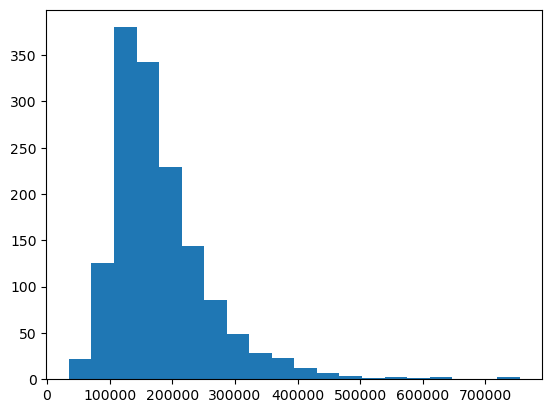

In [32]:
plt.hist(price, bins=20)
plt.show()

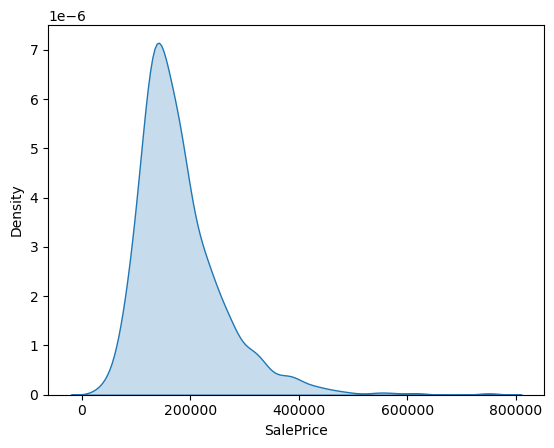

In [33]:
sns.kdeplot(price, fill=True)

plt.show()

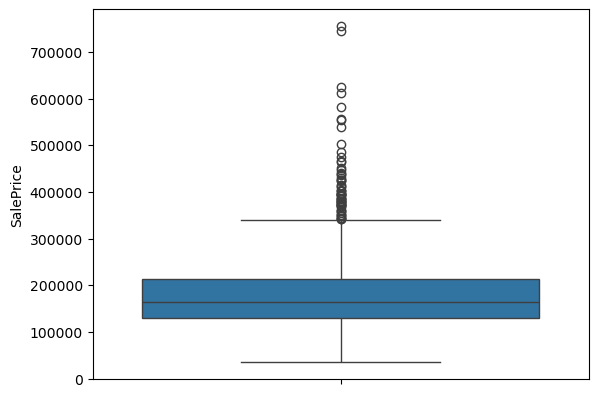

In [34]:
sns.boxplot(price)

plt.show()

In [35]:
# Log transformation

log_price = np.log(price)

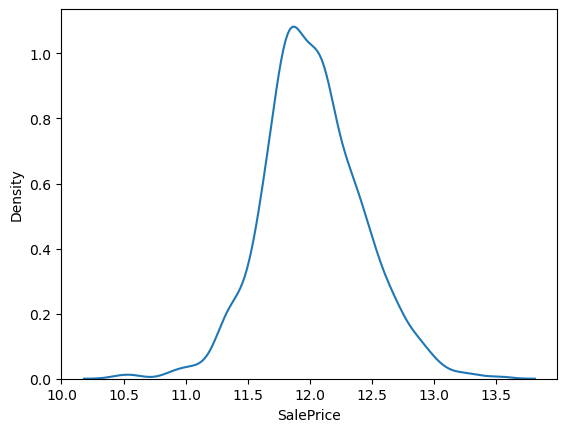

In [36]:
sns.kdeplot(log_price)
plt.show()

In [37]:
s = skew(log_price)
zscore, pvalue = skewtest(log_price)

print(f"Skewness: {s:.3f}, z-score: {zscore:.3f}, p-value: {pvalue:.3f}")

Skewness: 0.121, z-score: 1.894, p-value: 0.058


In [38]:
# Kurtosis

k = kurtosis(log_price)
zscore, pvalue = kurtosistest(log_price)

print(f"Kurtosis: {k:.3f}, z-score: {zscore:.3f}, p-value: {pvalue:.3f}")

Kurtosis: 0.803, z-score: 4.682, p-value: 0.000


Kurtosis is still high. May want to winsorize or something else before modeling.

Univariate Analysis

In [39]:
data['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [47]:
data.groupby('MSSubClass')['SalePrice'].median()

MSSubClass
20     159250.0
30      99900.0
40     142500.0
45     107500.0
50     132000.0
60     215200.0
70     156000.0
75     163500.0
80     166500.0
85     140750.0
90     135980.0
120    192000.0
160    146000.0
180     88500.0
190    128250.0
Name: SalePrice, dtype: float64

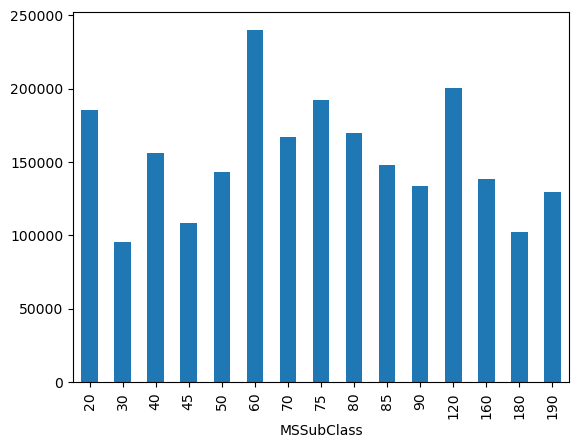

In [48]:
data.groupby('MSSubClass')['SalePrice'].mean().plot(kind='bar')
plt.show()

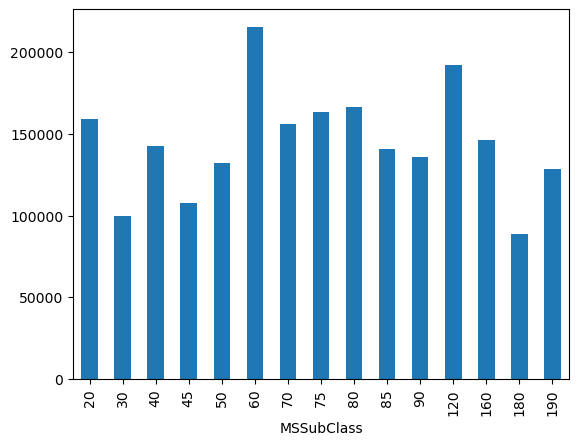

In [46]:
data.groupby('MSSubClass')['SalePrice'].median().plot(kind='bar')
plt.show()

In [43]:
# MSZoning

data['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

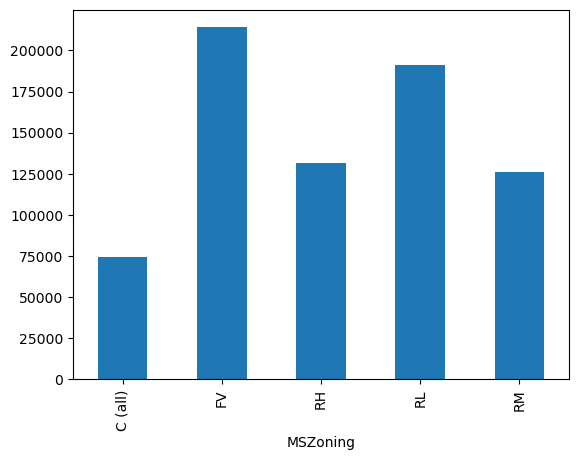

In [44]:
data.groupby('MSZoning')['SalePrice'].mean().plot(kind='bar')
plt.show()

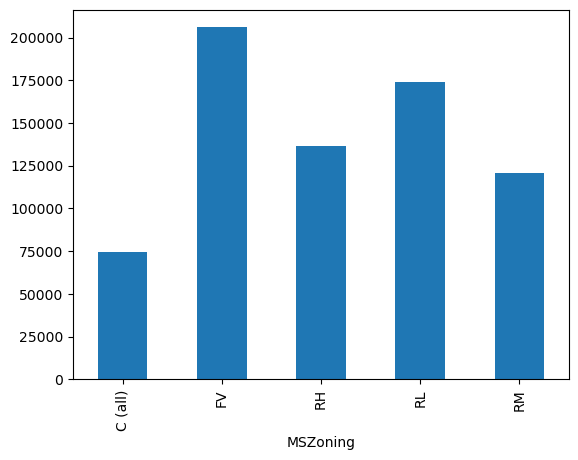

In [45]:
data.groupby('MSZoning')['SalePrice'].median().plot(kind='bar')
plt.show()

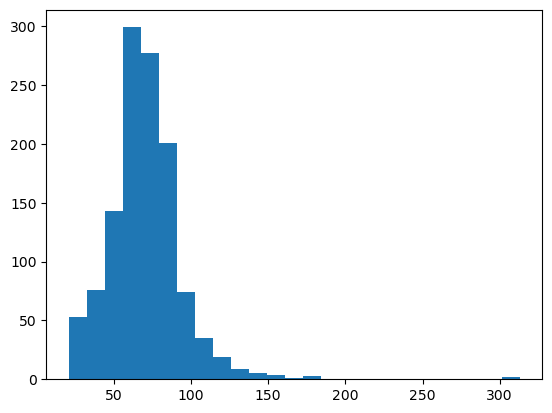

In [50]:
# LotFrontage

plt.hist(data['LotFrontage'], bins=25)
plt.show()

In [ ]:
# Why are there so many nulls in LotFrontage?
# Relationship between LotFrontage and LotArea?

In [52]:
null_frontage = data[data['LotFrontage'].isna()]
null_frontage.shape

(259, 81)

In [55]:
null_frontage['MSSubClass'].value_counts()

MSSubClass
20     99
60     69
80     20
120    20
50     16
160     8
85      6
30      6
90      5
70      5
190     3
75      1
40      1
Name: count, dtype: int64

In [56]:
null_frontage['MSZoning'].value_counts()

MSZoning
RL    229
RM     19
FV      8
RH      3
Name: count, dtype: int64

In [60]:
null_frontage['LotArea'].mean()

13137.370656370656

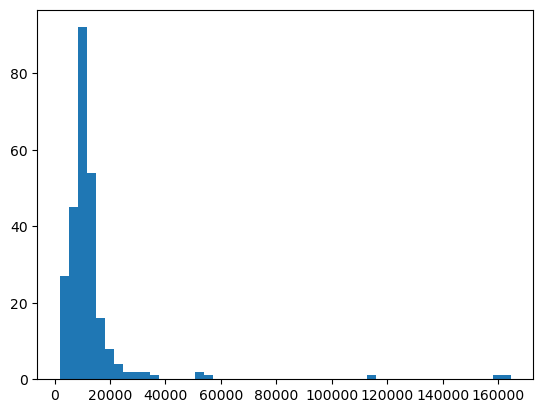

In [58]:
plt.hist(null_frontage['LotArea'], bins=50)
plt.show()

In [54]:
# Which columns have nulls?

cols_w_nulls = data.columns[data.isnull().any()].tolist()

cols_w_nulls

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [55]:
data['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [56]:
data[cols_w_nulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [57]:
# Trying some EDA looking only at the non-null values for now

data = data.drop(cols_w_nulls, axis=1)

data.shape

(1460, 62)

In [58]:
data.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'SalePrice']

In [59]:
data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [60]:
data['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

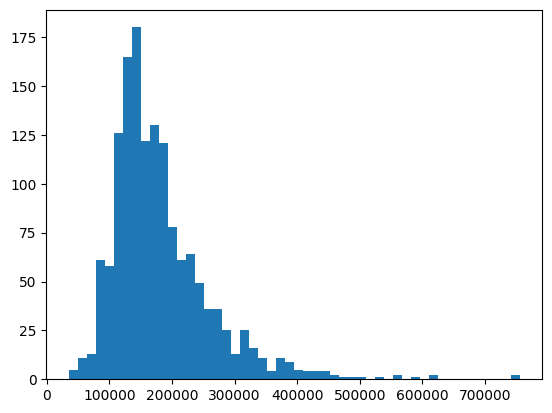

In [61]:
# Distribution of SalePrice

plt.hist(data['SalePrice'], bins=50)
plt.show()

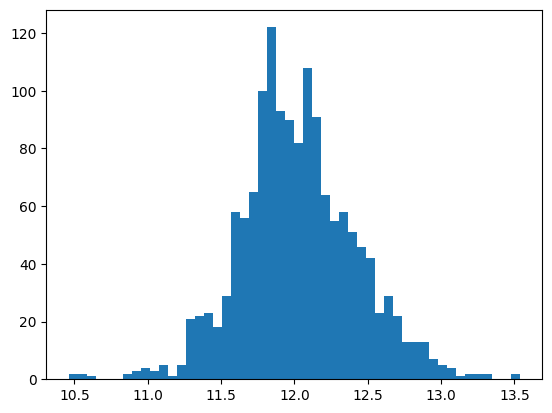

In [62]:
# Trying to normalize SalePrice with logarithmic transformation

log_sales = np.log(data['SalePrice'])

plt.hist(log_sales, bins=50)
plt.show()


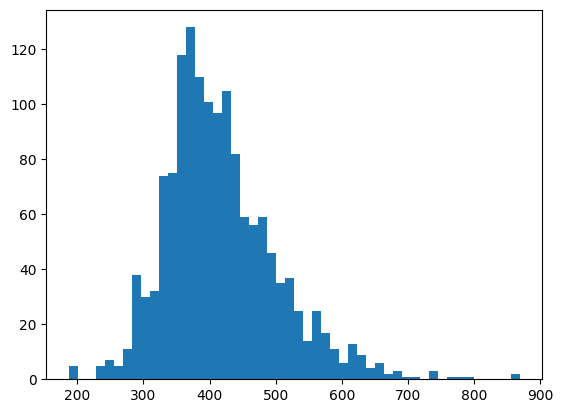

In [63]:
# Square root transformation

sqrt_sales = np.sqrt(data['SalePrice'])

plt.hist(sqrt_sales, bins=50)
plt.show()

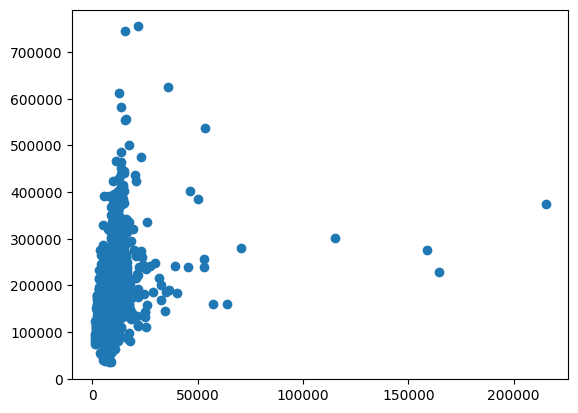

In [64]:
# Plotting SalePrice against a few other variables

plt.scatter(data['LotArea'], data['SalePrice'])

plt.show()

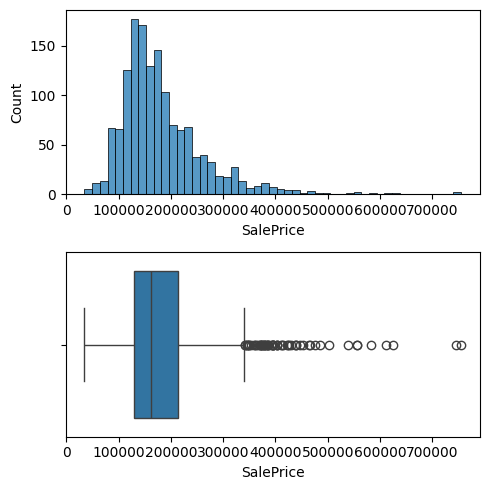

In [65]:
fig, axis = plt.subplots(2, 1, figsize=(5,5))

sns.histplot(ax=axis[0], data=data, x='SalePrice')
sns.boxplot(ax=axis[1], data=data, x='SalePrice')

plt.tight_layout()
plt.show()

In [66]:
# Locating the upper whisker

q1 = np.percentile(data['SalePrice'], 25)
q3 = np.percentile(data['SalePrice'], 75)

iqr = q3 - q1

upper_whisker = min(data['SalePrice'].max(), q3 + 1.5 * iqr)

upper_whisker

np.float64(340037.5)

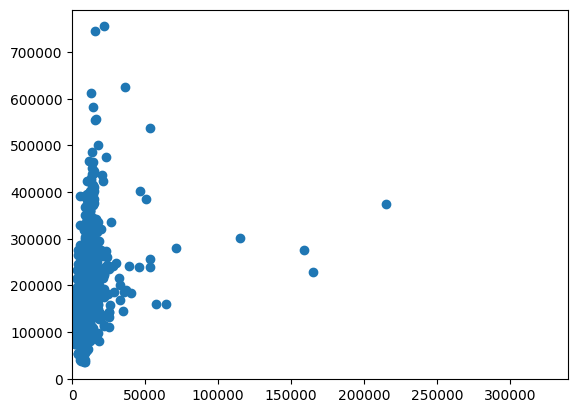

In [67]:
# Plotting LotArea against SalePrice with outliers removed

plt.scatter(data['LotArea'], data['SalePrice'])
plt.xlim(0, upper_whisker)

plt.show()

In [68]:
num_var = data.select_dtypes(include='number').columns.tolist()

len(num_var)

35

In [69]:
num_var

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [70]:
num_var.remove('Id')
num_var

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [71]:
data['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [72]:
# MSSubClass is a categorical variable--changing it to a string

data['MSSubClass'] = data['MSSubClass'].astype('object')

data['MSSubClass'].dtypes

dtype('O')

In [73]:
cat_var = data.select_dtypes(include='object').columns.tolist()
cat_var

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [74]:
data['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [88]:
data['OverallQual'].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

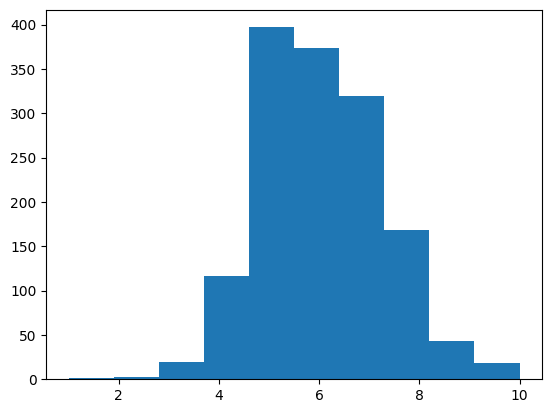

In [76]:
plt.hist(data['OverallQual'], bins=10)
plt.show()

In [77]:
data['OverallCond'].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [90]:
# Leaving quality and condition out of numerical analysis for now, may make them categorical later

num_var.remove('OverallCond')
num_var.remove('OverallQual')

In [78]:
data['YearBuilt'].value_counts(ascending=False)

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64

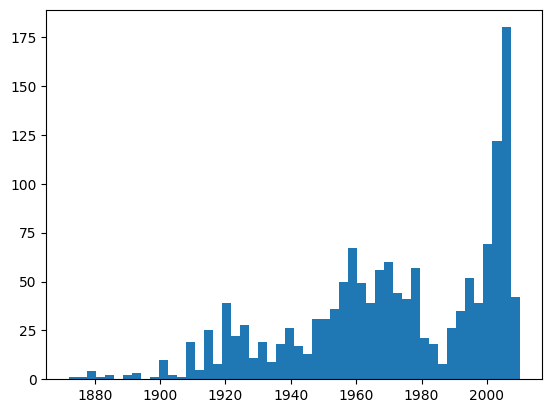

In [79]:
# Distribution of YearBuilt

plt.hist(data['YearBuilt'], bins=50)
plt.show()

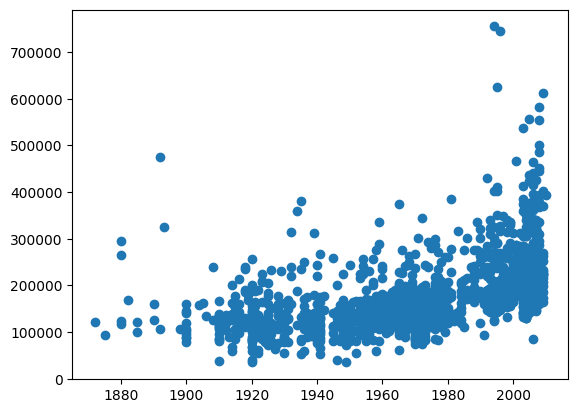

In [80]:
# Plotting YearBuilt against price

plt.scatter(data['YearBuilt'], data['SalePrice'])
plt.show()

In [81]:
data['YearRemodAdd'].value_counts()

YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: count, Length: 61, dtype: int64

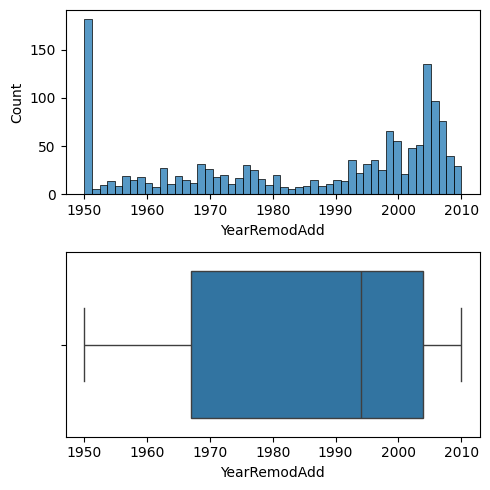

In [82]:
# Visualizing YearRemodAdd

fig, axis = plt.subplots(2, 1, figsize=(5,5))

sns.histplot(ax=axis[0], data=data, x='YearRemodAdd', bins=50)
sns.boxplot(ax=axis[1], data=data, x='YearRemodAdd')

plt.tight_layout()
plt.show()

In [83]:
data['YearRemodAdd'].min()

np.int64(1950)

Many houses remodeled in 1950--possibly this was the date assigned to homes that clearly had work done but the actual date is unknown.

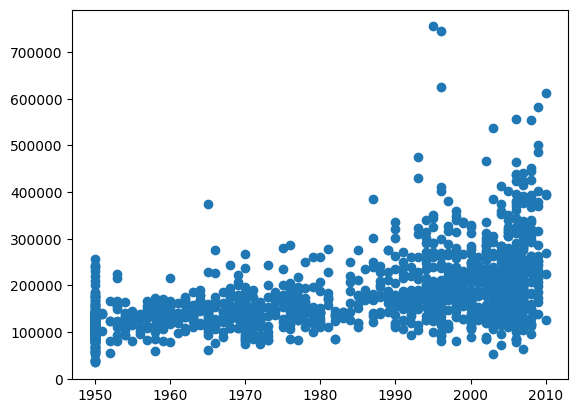

In [84]:
plt.scatter(data['YearRemodAdd'], data['SalePrice'])
plt.show()

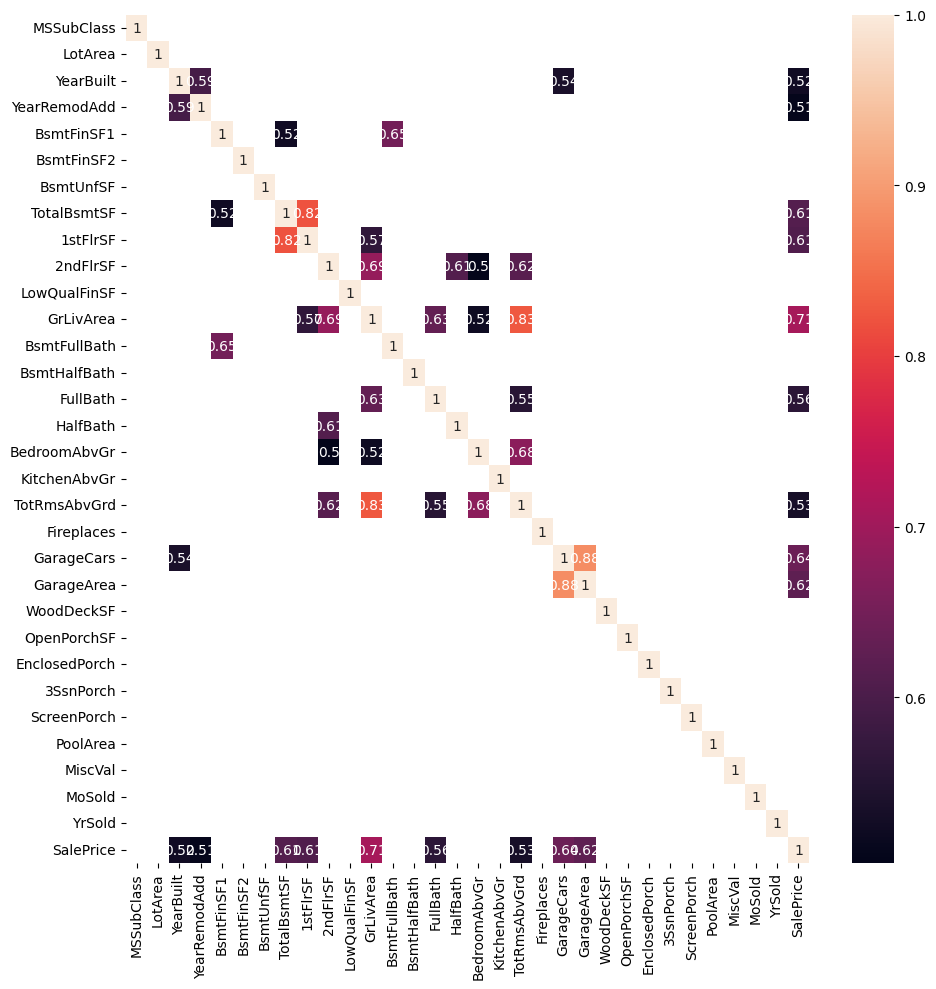

In [96]:
# Heatmap of higher correlated numerical variables

corr = data[num_var].corr()

filt_corr = corr[corr.abs() > 0.5]
filt_corr = filt_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

plt.figure(figsize=(10,10))

sns.heatmap(filt_corr, annot=True)

plt.tight_layout()
plt.show()